Accuracy vs Max Depth:
  max_depth  accuracy
0         2  0.977778
1         3  0.977778
2         4  1.000000
3         5  0.977778
4      None  0.977778


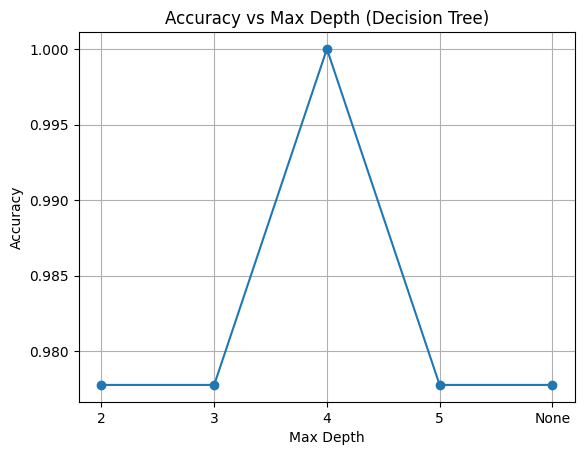


Best Parameters from Grid Search:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best CV Accuracy: 0.9428571428571428
Test Accuracy: 1.0


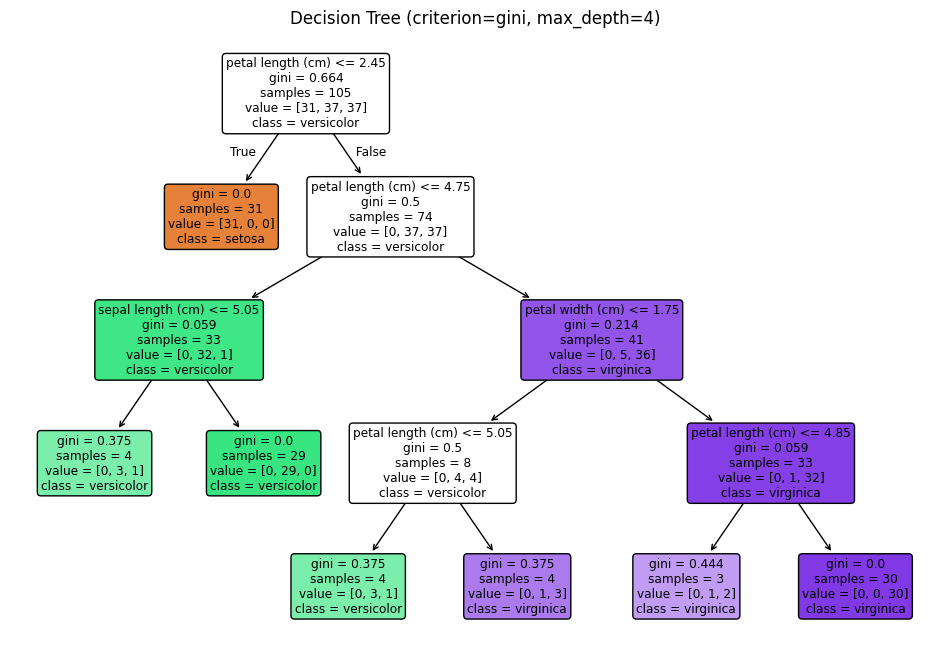

In [3]:
# ============================
# Decision Tree Implementation + Grid Search + Visualization
# ============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# ----------------------------
# Load dataset
# ----------------------------
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------
# Compare different max_depths
# ----------------------------
depth_results = []
for depth in [2, 3, 4, 5, None]:
    model = DecisionTreeClassifier(
        criterion="entropy", max_depth=depth,
        min_samples_split=2, min_samples_leaf=1, random_state=42
    )
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    depth_results.append({"max_depth": depth if depth else "None", "accuracy": acc})

df_depth = pd.DataFrame(depth_results)
print("Accuracy vs Max Depth:")
print(df_depth)

# Plot accuracy vs max_depth
plt.plot([str(d) for d in df_depth["max_depth"]], df_depth["accuracy"], marker="o")
plt.title("Accuracy vs Max Depth (Decision Tree)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ----------------------------
# Grid Search for multiple parameters
# ----------------------------
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:")
print(grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate best model on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# ----------------------------
# Plot the final decision tree
# ----------------------------
plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True,
          feature_names=load_iris().feature_names,
          class_names=load_iris().target_names,
          rounded=True)
plt.title(f"Decision Tree (criterion={best_model.criterion}, max_depth={best_model.max_depth})")
plt.show()


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best CV Accuracy: 0.9428571428571428
Test Accuracy: 1.0


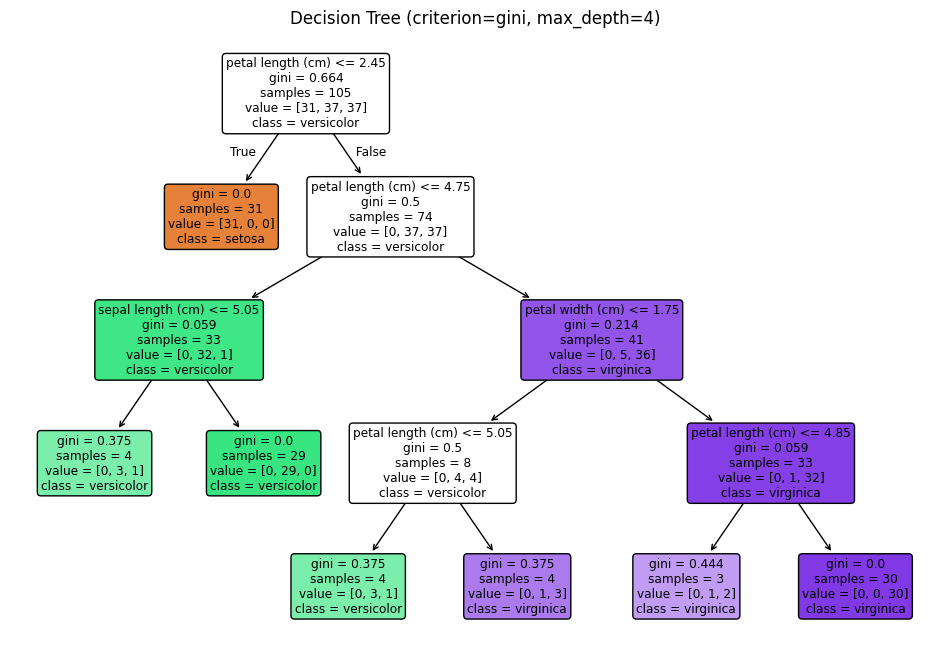

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Grid search with multiple parameters
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Test set evaluation
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True,
          feature_names=load_iris().feature_names,
          class_names=load_iris().target_names,
          rounded=True)
plt.title(f"Decision Tree (criterion={best_model.criterion}, max_depth={best_model.max_depth})")
plt.show()
